In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Supervised Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Unsupervised Model
from sklearn.cluster import KMeans

# Neural Network
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Visual style
sns.set(style="whitegrid")


In [3]:
# Loading dataset
#data_path = "/content/drive/MyDrive/422project dataset/11.csv"
#df = pd.read_csv(data_path)
df = pd.read_csv('https://raw.githubusercontent.com/Berserker268/CSE422-Project/refs/heads/main/11.csv')
# Display first 5 rows
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Dataset shape
print("Dataset Shape (Rows, Columns):", df.shape)


Dataset Shape (Rows, Columns): (119390, 32)


In [ ]:
# Column names
print("Columns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# Dataset info (data types + non-null counts)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Checking missing values
missing_values = df.isnull().sum().sort_values(ascending=False)

print("Missing Values (Top 15 columns):")
missing_values.head(15)


Missing Values (Top 15 columns):


,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [ ]:
# Summary statistics (numerical)
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Exploratory Data Analysis (EDA)
In this section, we analyze the dataset to understand patterns, distributions, and relationships between features and the target variable.


## Target Variable Analysis
The target variable for this project is `is_canceled`, where:
- 0 = Booking Not Canceled
- 1 = Booking Canceled


In [ ]:
# Target variable distribution
df["is_canceled"].value_counts()


,count
is_canceled,
0,75166
1,44224


In [ ]:
# Target distribution in percentage
df["is_canceled"].value_counts(normalize=True) * 100


,proportion
is_canceled,
0,62.958372
1,37.041628


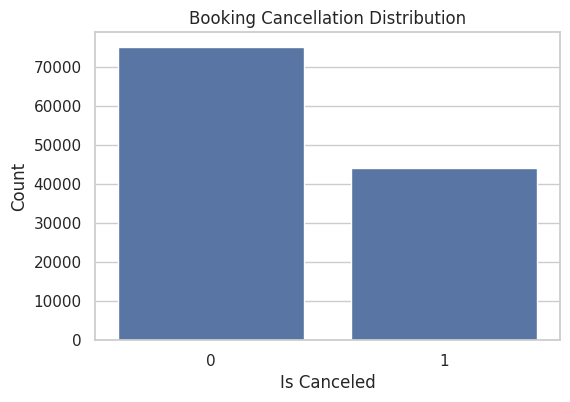

In [ ]:
# Visualizing target distribution
plt.figure(figsize=(6,4))
sns.countplot(x="is_canceled", data=df)
plt.title("Booking Cancellation Distribution")
plt.xlabel("Is Canceled")
plt.ylabel("Count")
plt.show()


## Numerical Feature Distribution
We visualize some important numerical features to understand their spread.


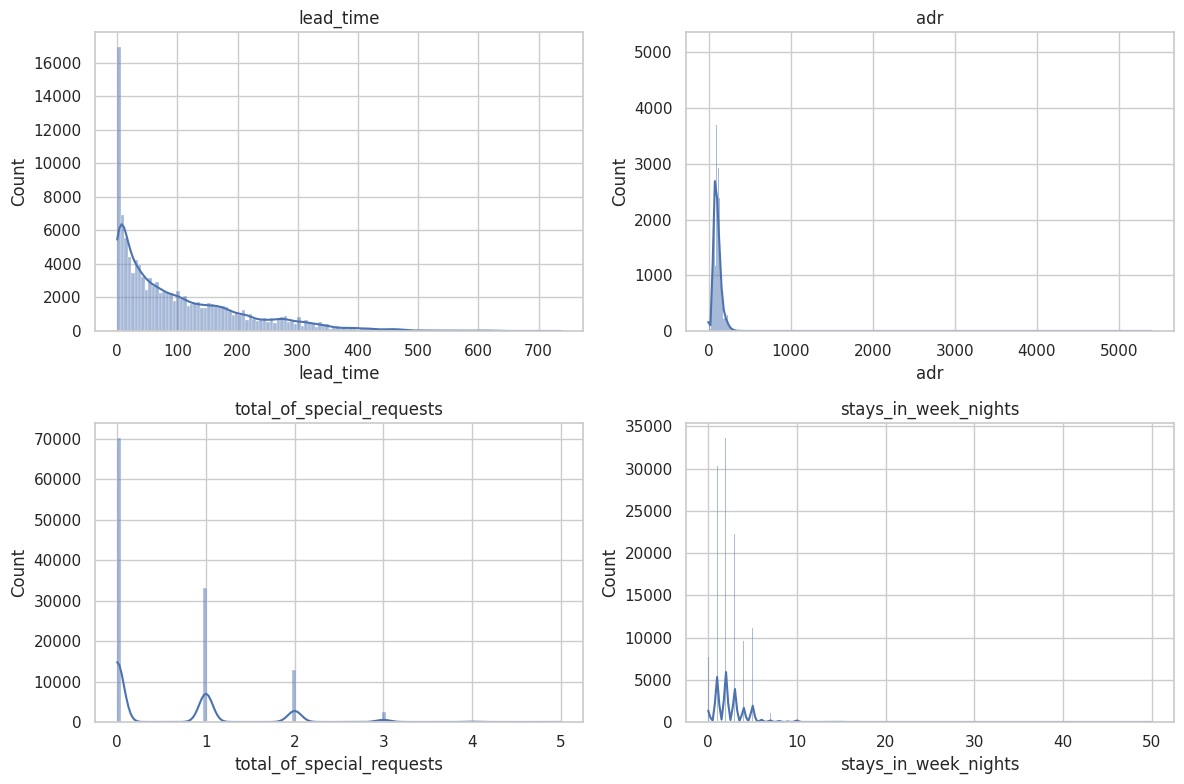

In [ ]:
num_cols = [
    "lead_time",
    "adr",
    "total_of_special_requests",
    "stays_in_week_nights"
]

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


## Correlation Analysis
We analyze correlations among numerical variables.


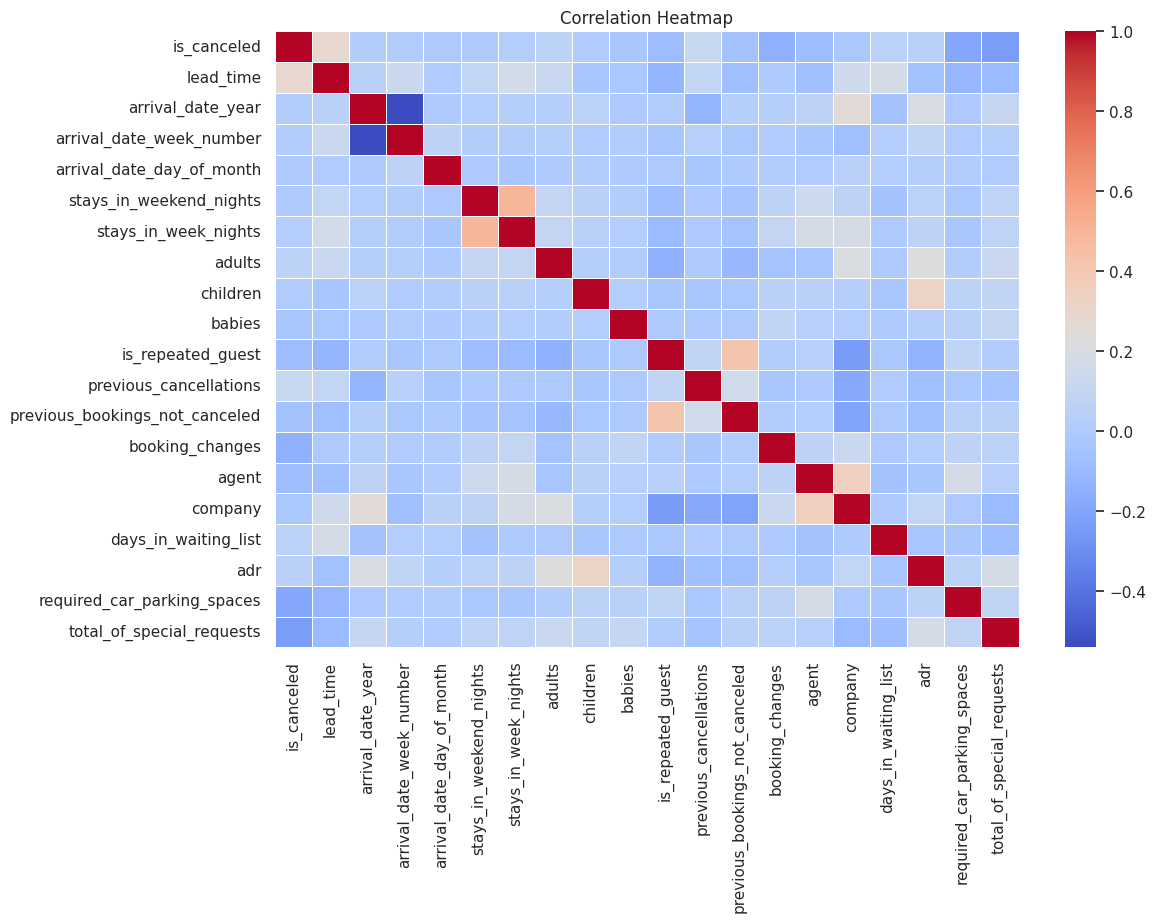

In [ ]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=["int64", "float64"]).corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
leakage_cols = [
    "reservation_status",
    "reservation_status_date"
]

df = df.drop(columns=[c for c in leakage_cols if c in df.columns])


# Data Preprocessing & Feature Engineering
This section prepares the dataset for machine learning by handling missing values, encoding categorical features, and scaling numerical data.


## Feature Engineering
We create new features that may improve model performance.


In [ ]:
# Creating new features

# Total guests
df["children"] = df["children"].fillna(0)
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

# Total stay duration
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,2.0,2


## Target & Feature Separation


In [ ]:
# Separating features and target
X = df.drop(columns=["is_canceled"])
y = df["is_canceled"]


In [ ]:
country_freq = X["country"].value_counts(normalize=True)
X["country_freq"] = X["country"].map(country_freq)
X["country_freq"].fillna(0, inplace=True)
X = X.drop(columns=["country"])

/tmp/ipython-input-1585229919.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["country_freq"].fillna(0, inplace=True)


## Identifying Numerical and Categorical Columns


In [ ]:
# Identifying column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

print("Numerical Features:", len(numeric_features))
print("Categorical Features:", len(categorical_features))


Numerical Features: 22
Categorical Features: 9


## Preprocessing Pipeline


In [ ]:
# Numerical pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [ ]:
country_freq = df["country"].value_counts(normalize=True)
df["country_freq"] = df["country"].map(country_freq)
df["country_freq"].fillna(0, inplace=True)

/tmp/ipython-input-2129379186.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["country_freq"].fillna(0, inplace=True)


## Train-Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## Applying Preprocessing


In [ ]:
# Fit on training data only
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed Train Shape:", X_train_processed.shape)
print("Processed Test Shape:", X_test_processed.shape)


Processed Train Shape: (95512, 83)
Processed Test Shape: (23878, 83)


# Supervised Learning Model 1: Logistic Regression
Logistic Regression is a linear classification algorithm used for binary classification problems.


In [ ]:
# Initializing Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)


In [ ]:
# Training the model
log_reg.fit(X_train_processed, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predictions
y_pred_lr = log_reg.predict(X_test_processed)


## Model Evaluation


In [ ]:
# Evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Performance")
print("Accuracy :", accuracy_lr)
print("Precision:", precision_lr)
print("Recall   :", recall_lr)
print("F1-score :", f1_lr)


Logistic Regression Performance
Accuracy : 0.810788173213837
Precision: 0.8122384182421706
Recall   : 0.6362916902204635
F1-score : 0.7135793077215672


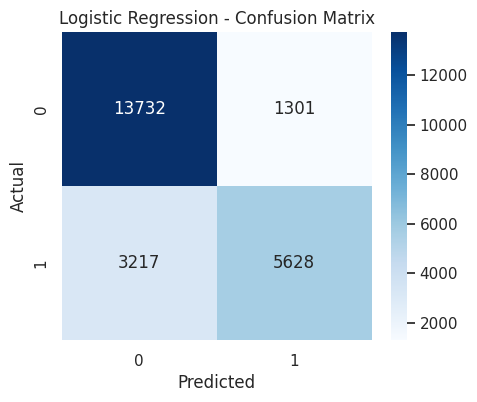

In [ ]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Classification report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.81      0.91      0.86     15033
           1       0.81      0.64      0.71      8845

    accuracy                           0.81     23878
   macro avg       0.81      0.77      0.79     23878
weighted avg       0.81      0.81      0.80     23878



# Neural Network Model: Multi-Layer Perceptron (MLP)
A Multi-Layer Perceptron (MLP) is a feedforward artificial neural network that can model complex non-linear relationships.


In [ ]:
# Initializing Neural Network model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=50,
    random_state=42
)


In [ ]:
# Training the Neural Network
mlp_model.fit(X_train_processed, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=50, random_state=42)

In [ ]:
# Predictions
y_pred_mlp = mlp_model.predict(X_test_processed)


## Neural Network Evaluation


In [ ]:
# Evaluation metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print("Neural Network Performance")
print("Accuracy :", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall   :", recall_mlp)
print("F1-score :", f1_mlp)


Neural Network Performance
Accuracy : 0.8678700058631376
Precision: 0.8343911612599906
Recall   : 0.802600339174675
F1-score : 0.8181870569930272


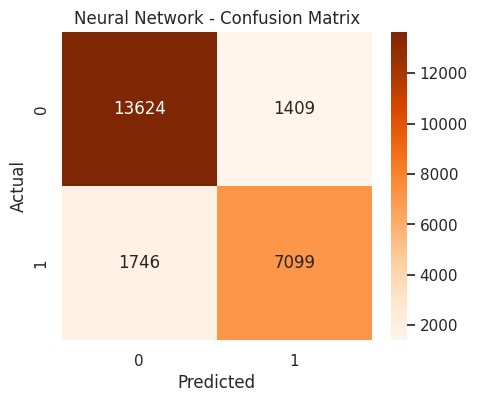

In [ ]:
# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(5,4))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Oranges")
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Classification report
print(classification_report(y_test, y_pred_mlp))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90     15033
           1       0.83      0.80      0.82      8845

    accuracy                           0.87     23878
   macro avg       0.86      0.85      0.86     23878
weighted avg       0.87      0.87      0.87     23878



# Supervised Learning Model 3: Random Forest Classifier
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.


In [ ]:
# Initializing Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


In [ ]:
# Training the model
rf_model.fit(X_train_processed, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test_processed)


## Model Evaluation


In [ ]:
# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Performance")
print("Accuracy :", accuracy_rf)
print("Precision:", precision_rf)
print("Recall   :", recall_rf)
print("F1-score :", f1_rf)


Random Forest Performance
Accuracy : 0.8941703660273055
Precision: 0.8895191122071516
Recall   : 0.8156020350480497
F1-score : 0.8509584193453259


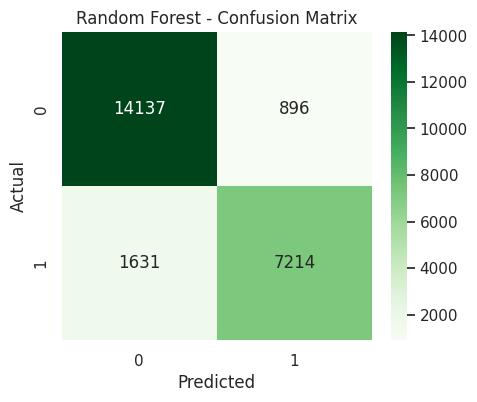

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Classification report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15033
           1       0.89      0.82      0.85      8845

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878



# ROC Curve and AUC Analysis


In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
# Logistic Regression
y_prob_lr = log_reg.predict_proba(X_test_processed)[:, 1]

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test_processed)[:, 1]

# Neural Network
y_prob_mlp = mlp_model.predict_proba(X_test_processed)[:, 1]


In [ ]:
# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Neural Network
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
auc_mlp = auc(fpr_mlp, tpr_mlp)


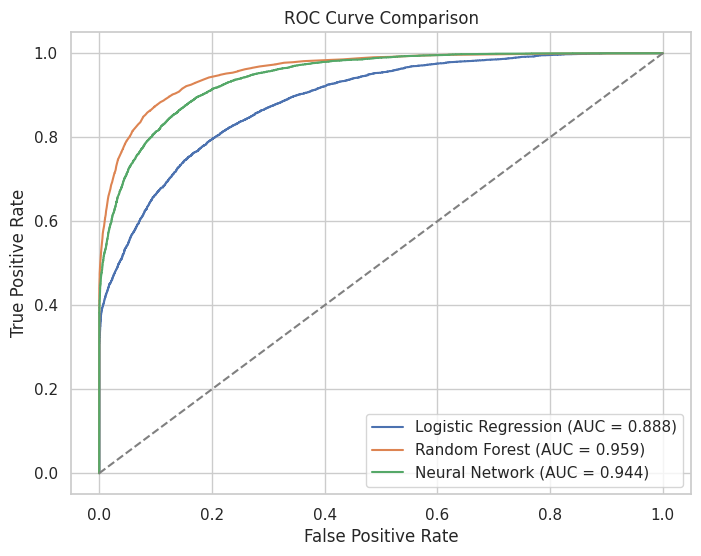

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"Neural Network (AUC = {auc_mlp:.3f})")

# Diagonal baseline
plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


# Unsupervised Learning: K-Means Clustering
In this section, we apply K-Means clustering (MiniBatchKMeans) to group similar bookings into clusters.
We use the elbow method and silhouette score to identify an appropriate number of clusters.


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# We'll test multiple k values
k_values = [2, 3, 4, 5, 6, 7, 8]

inertias = []
sil_scores = []

# Use a smaller sample for silhouette (faster) while inertia can run on full train
# (Silhouette is expensive on large datasets)
sample_size = 5000

# Create a sample safely (works for sparse matrices)
rng = np.random.RandomState(42)
idx = rng.choice(X_train_processed.shape[0], size=min(sample_size, X_train_processed.shape[0]), replace=False)
X_sample = X_train_processed[idx]

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=2048, n_init="auto")
    kmeans.fit(X_train_processed)

    inertias.append(kmeans.inertia_)

    # silhouette score on sample
    sample_labels = kmeans.predict(X_sample)
    sil = silhouette_score(X_sample, sample_labels)
    sil_scores.append(sil)

print("K values:", k_values)
print("Inertias:", inertias)
print("Silhouette scores:", sil_scores)


K values: [2, 3, 4, 5, 6, 7, 8]
Inertias: [2460549.682428041, 2291711.5736886268, 2158812.4959271606, 2084664.7162755362, 1996008.650399848, 1979227.5197794982, 1918956.4671615486]
Silhouette scores: [np.float64(0.10817947382284719), np.float64(0.03624595222844126), np.float64(0.05709225824045567), np.float64(0.07367729458031638), np.float64(0.08038867971184892), np.float64(0.07877085839632718), np.float64(0.04375420808757027)]


## Elbow Method (Inertia Plot)
Lower inertia is better, but we choose K where improvement slows down (the "elbow").


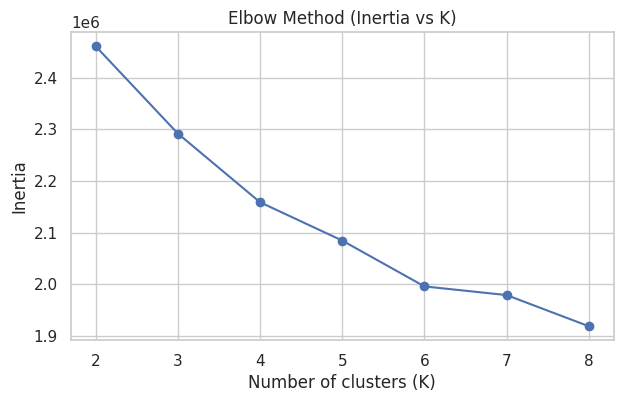

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()


## Silhouette Score Plot
Higher silhouette score indicates better-defined clusters.


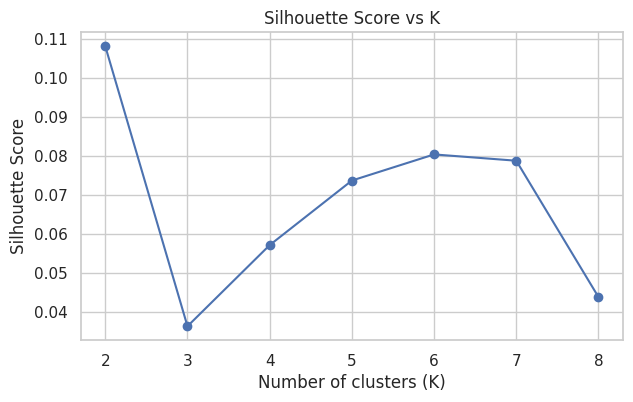

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(k_values, sil_scores, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


## Fitting Final K-Means Model
We pick a final K based on elbow + silhouette.
(We'll choose K=4 as a reasonable default if not obvious.)


In [ ]:
# Choose K (you can change this based on the plots)
BEST_K = 4

final_kmeans = MiniBatchKMeans(n_clusters=BEST_K, random_state=42, batch_size=2048, n_init="auto")
final_kmeans.fit(X_train_processed)

# Assign clusters to train and test
train_clusters = final_kmeans.predict(X_train_processed)
test_clusters = final_kmeans.predict(X_test_processed)

print("Cluster counts in train:")
print(pd.Series(train_clusters).value_counts().sort_index())


Cluster counts in train:
0      719
1    45897
2    18438
3    30458
Name: count, dtype: int64


## Cluster Interpretation (Relation with Target)
Even though clustering is unsupervised, we can check how cancellation rate differs per cluster.


Cancellation rate per cluster:


,is_canceled
cluster,
0,0.197497
1,0.430333
2,0.315002
3,0.317749


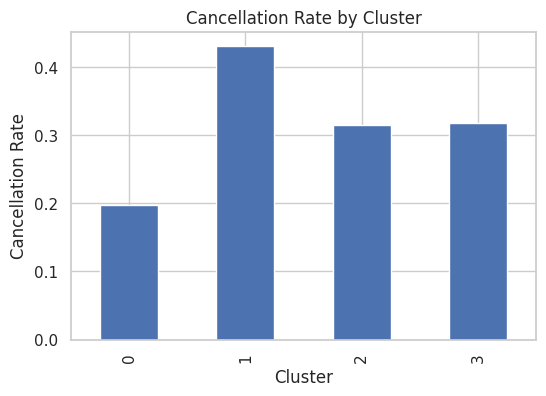

In [ ]:
# Add cluster labels back for interpretation
train_analysis = X_train.copy()
train_analysis["cluster"] = train_clusters
train_analysis["is_canceled"] = y_train.values

# Cancellation rate per cluster
cluster_cancel_rate = train_analysis.groupby("cluster")["is_canceled"].mean().sort_index()

print("Cancellation rate per cluster:")
display(cluster_cancel_rate)

plt.figure(figsize=(6,4))
cluster_cancel_rate.plot(kind="bar")
plt.title("Cancellation Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cancellation Rate")
plt.show()


# Model Comparison
In this section, we compare the performance of all supervised models used in this project.


In [ ]:
# Creating comparison table
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Neural Network (MLP)"
    ],
    "Accuracy": [
        accuracy_lr,
        accuracy_rf,
        accuracy_mlp
    ],
    "Precision": [
        precision_lr,
        precision_rf,
        precision_mlp
    ],
    "Recall": [
        recall_lr,
        recall_rf,
        recall_mlp
    ],
    "F1-score": [
        f1_lr,
        f1_rf,
        f1_mlp
    ]
})

results


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.810788,0.812238,0.636292,0.713579
1,Random Forest,0.894170,0.889519,0.815602,0.850958
2,Neural Network (MLP),0.867870,0.834391,0.802600,0.818187


## Performance Comparison Visualization


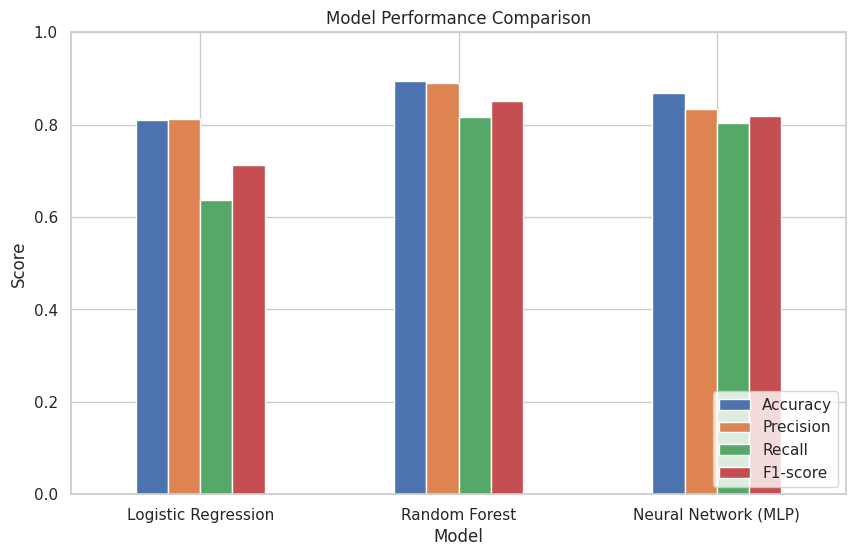

In [ ]:
# Plotting comparison
results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
